In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
# Load dataset
df = pd.read_csv('diabetes.csv')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print (df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1
5            5      116             74              0        0  25.6                     0.201   30        0
6            3       78             50             32       88  31.0                     0.248   26        1
7           10      115              0              0        0  35.3                     0.134   29        0
8            2     

In [52]:
#Menunjukan kolom dan baris

df.shape
df ['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [53]:
# Memisahkan data dan label
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print (X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age
0              6      148             72             35        0  33.6                     0.627   50
1              1       85             66             29        0  26.6                     0.351   31
2              8      183             64              0        0  23.3                     0.672   32
3              1       89             66             23       94  28.1                     0.167   21
4              0      137             40             35      168  43.1                     2.288   33
..           ...      ...            ...            ...      ...   ...                       ...  ...
763           10      101             76             48      180  32.9                     0.171   63
764            2      122             70             27        0  36.8                     0.340   27
765            5      121             72             23      112  26.2            

In [54]:
print (Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [55]:
scaler = StandardScaler()
standarized_data = scaler.fit_transform(X)  #menghasilkan data yang telah distandardisasi

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Konversi hasil standarisasi ke DataFrame dengan kolom yang sama dengan X
standarized_df = pd.DataFrame(standarized_data, columns=X.columns)

# Menampilkan hasil
print(standarized_df)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013                  0.468492  1.425995
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422                 -0.365061 -0.190672
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255                  0.604397 -0.105584
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043                 -0.920763 -1.041549
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746                  5.484909 -0.020496
..           ...       ...            ...            ...       ...       ...                       ...       ...
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169                 -0.908682  2.532136
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154                 -0.

In [56]:
X = standarized_data
Y = df['Outcome']

In [58]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)      

# Menampilkan data X (standarized_data) dan Y (Outcome)
print("Data Standarized (X):")
print(standarized_df)

print("\nData Label (Y):")
print(Y.to_frame())  

Data Standarized (X):
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013                  0.468492  1.425995
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422                 -0.365061 -0.190672
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255                  0.604397 -0.105584
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043                 -0.920763 -1.041549
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746                  5.484909 -0.020496
..           ...       ...            ...            ...       ...       ...                       ...       ...
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169                 -0.908682  2.532136
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.6101

In [59]:
# Memisahkan data training dan data testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [60]:
print (X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [61]:
# Menciptakan model perceptron
classifier = Perceptron()

In [62]:
# Melatih model
classifier.fit(X_train, Y_train)

Perceptron()

In [63]:
# Evaluasi dengan data training
X_train_prediction = classifier.predict(X_train)
test_predictions = classifier.predict(X_test)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Akurasi data training adalah = ', training_data_accuracy)


Akurasi data training adalah =  0.754071661237785


In [64]:
# Evaluasi dengan data testing
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.7532467532467533


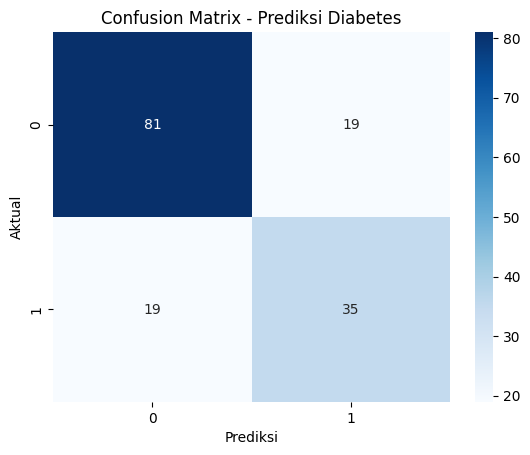

In [65]:
# Matriks kebingungan untuk hasil prediksi
cm = confusion_matrix(Y_test, test_predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Prediksi Diabetes')
plt.show()

In [66]:
input_data = (5, 116, 74, 0, 0, 25.6, 0.201, 30)

input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] ==0):
    print('Pasien tidak terkena Diabetes')
else :
    print('Pasien terkena Diabetes')

[[ 0.3429808  -0.15318486  0.25303625 -1.28821221 -0.69289057 -0.81134119
  -0.81807858 -0.27575966]]
[0]
Pasien tidak terkena Diabetes


/Users/berkelana/Project-Semester-5/vercel-diabetes/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [67]:
# Laporan klasifikasi yang lebih lengkap
print(classification_report(Y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       100
           1       0.65      0.65      0.65        54

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [73]:
from sklearn.svm import SVC
import pickle

# Memuat dataset diabetes
diabetes_data = pd.read_csv('diabetes.csv')

# Memisahkan fitur dan target
X = diabetes_data.drop(columns=['Outcome'])  # Fitur
y = diabetes_data['Outcome']  # Target

# Melatih model SVC
diabetes_model = SVC()
diabetes_model.fit(X, y)

# Menyimpan model yang dilatih
with open('diabetes_model.sav', 'wb') as file:
    pickle.dump((scaler, diabetes_model), file)


In [71]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [72]:
print(type(scaler), type(diabetes_model))

<class 'sklearn.preprocessing._data.StandardScaler'> <class 'sklearn.svm._classes.SVC'>
